# Visualization

This notebook contains codes to visualize the heatmaps in the article. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage

x_labels = ["U_R1","U_R2","U_R3","U_R4","P_R1","P_R2","P_R3","M_R1","M_R2","M_R3"]

def plot_heatmap(mat, min_val=-5, max_val=5, x_labels=["U_R1","U_R2","U_R3","U_R4","P_R1","P_R2","P_R3","M_R1","M_R2","M_R3"]):
    plt.figure(figsize=(20,10))
    plt.imshow(mat, interpolation="nearest", aspect="auto", cmap=cm.coolwarm, vmin=min_val, vmax=max_val)
    plt.xticks(np.arange(len(x_labels)),x_labels)
    plt.xlabel("Replicates")
    plt.ylabel("Gene Symbols")
    plt.title("Corrected log2 ratios (min: %.2f, max: %.2f)" % (min_val, max_val))
    plt.colorbar()
    plt.show()

def llf(id):
    x_labels = ["U_R1","U_R2","U_R3","U_R4","P_R1","P_R2","P_R3","M_R1","M_R2","M_R3"]
    return(x_labels[id])
    
def cluster_and_plot(X, method_list=["complete"], metric="euclidean"):
    fig_size = [25,10]
    for method in method_list:
        Z = linkage(X, method=method, metric=metric)
        fig = plt.figure(figsize=(fig_size[0], fig_size[1]))
        dn = dendrogram(Z, leaf_rotation=90)
        title_str = "Clustering of phospho-sites (" + method + ", " + metric + ")"
        plt.title(title_str)

        #Z = linkage(X.T, method=method, metric=metric)
        #fig = plt.figure(figsize=(fig_size[0], fig_size[1]))
        #dn = dendrogram(Z)
        #title_str = "Clustering of treatment groups (" + method + ", " + metric + ")"
        #plt.title(title_str)

        Z = linkage(X.T, method=method, metric=metric)
        fig = plt.figure(figsize=(fig_size[0], fig_size[1]))
        dn = dendrogram(Z, leaf_label_func=llf)
        title_str = "Clustering of treatment groups (" + method + ", " + metric + ")"
        plt.title(title_str)
    plt.show()

## From Supplementary Data S1

In [2]:
filename = "../data/supplementary_data/s1.xls"
xls = pd.read_excel(filename)
print(xls.shape)

ind = 0
for column in xls.columns:
    print(ind, column)
    ind = ind + 1
    
#print(xls.columns)
#xls.head()

(9181, 15)
0 Gene Symbol
1 Untreated R#1 log2 corrected ratio 126/(126+127N+127C+128N)
2 Untreated R#2 log2 corrected ratio 127 N/(126+127N+127C+128N)
3 Untreated R#3 log2 corrected ratio 127 C/(126+127N+127C+128N)
4 Untreated R#4 log2 corrected ratio 128 N/(126+127N+127C+128N)
5 Pervanadate R#1 log2 corrected ratio 128 C/(126+127N+127C+128N)
6 Pervanadate R#2 log2 corrected ratio 129 N/(126+127N+127C+128N)
7 Pervanadate R#3 log2 corrected ratio 129 C/(126+127N+127C+128N)
8 Mitotic R#1 log2 corrected ratio 130 N/(126+127N+127C+128N)
9 Mitotic R#2 log2 corrected ratio 130 C/(126+127N+127C+128N)
10 Mitotic R#3 log2 corrected ratio 131/(126+127N+127C+128N)
11 Untreated average log2 corrected ratio
12 Pervandate average log2 corrected ratio
13 Mitotic average log2 corrected ratio
14 Protein precursor area


Index(['Untreated R#1 log2 corrected ratio 126/(126+127N+127C+128N)',
       'Untreated R#2 log2 corrected ratio 127 N/(126+127N+127C+128N)',
       'Untreated R#3 log2 corrected ratio 127 C/(126+127N+127C+128N)',
       'Untreated R#4 log2 corrected ratio 128 N/(126+127N+127C+128N)',
       'Pervanadate R#1 log2 corrected ratio 128 C/(126+127N+127C+128N)',
       'Pervanadate R#2 log2 corrected ratio 129 N/(126+127N+127C+128N)',
       'Pervanadate R#3 log2 corrected ratio 129 C/(126+127N+127C+128N)',
       'Mitotic R#1 log2 corrected ratio 130 N/(126+127N+127C+128N)',
       'Mitotic R#2 log2 corrected ratio 130 C/(126+127N+127C+128N)',
       'Mitotic R#3 log2 corrected ratio 131/(126+127N+127C+128N)'],
      dtype='object')
(9181, 10)
-3.97618047868 4.22317174513


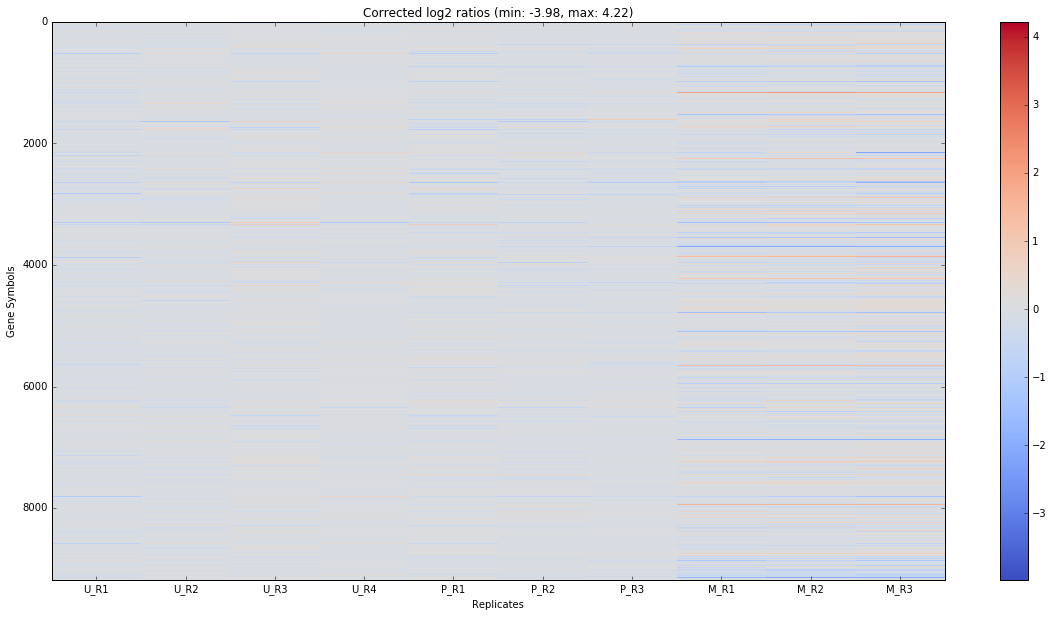

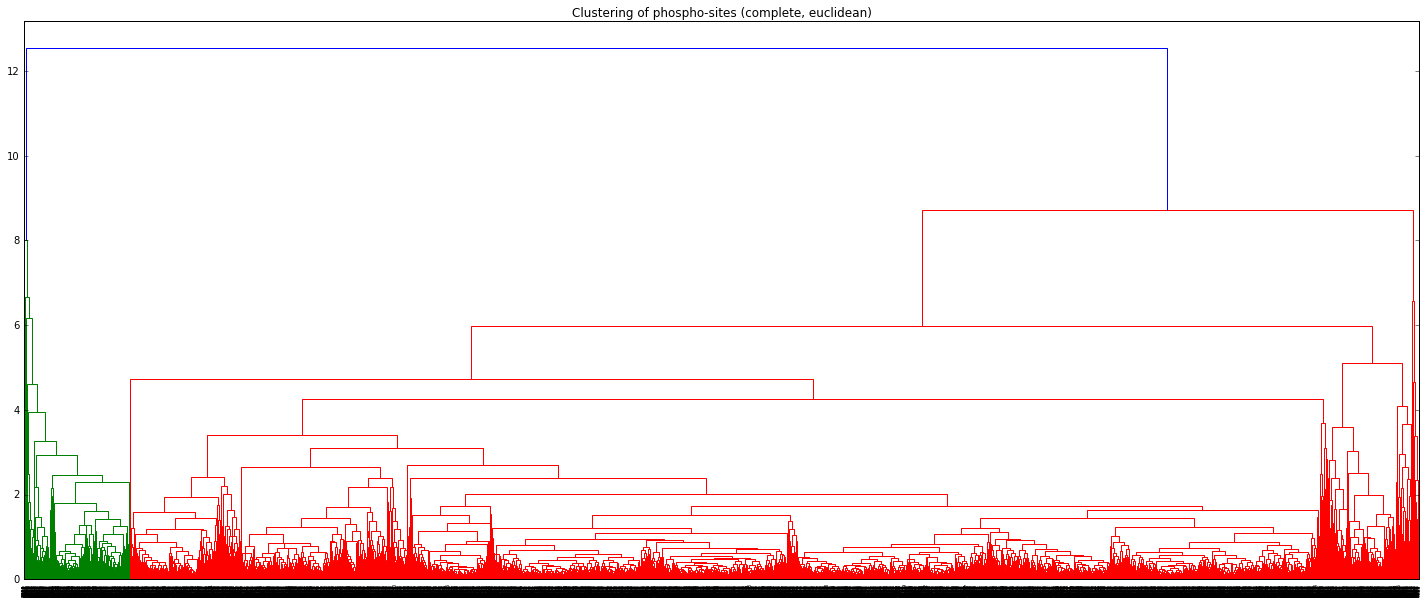

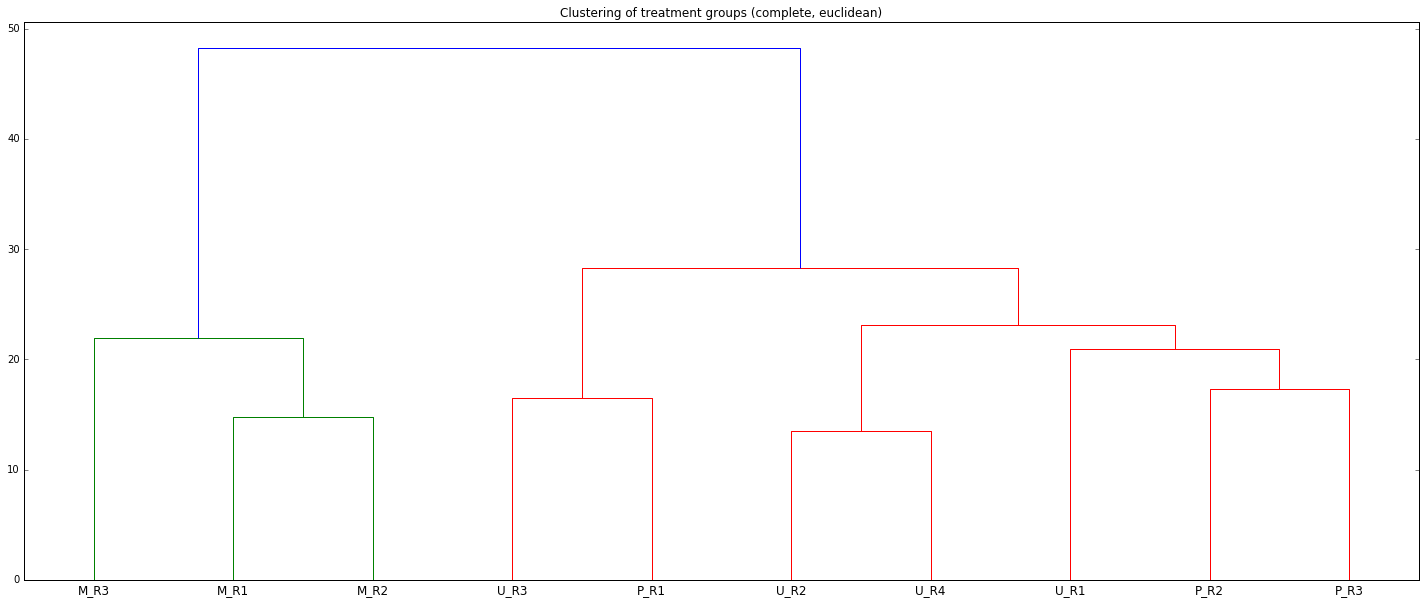

In [3]:
selected_columns = xls.columns[1:11]
print(selected_columns)

mat = xls.as_matrix(columns=selected_columns)
print(mat.shape)

min_val = np.min(mat)
max_val = np.max(mat)
print(min_val, max_val)

plot_heatmap(mat, min_val=min_val, max_val=max_val)
cluster_and_plot(mat)

## From Supplementary Data S2

In [4]:
filename = "../data/supplementary_data/s2.xls"
xls = pd.read_excel(filename)
print(xls.shape)

ind = 0
for column in xls.columns:
    print(ind, column)
    ind = ind + 1
    
#print(xls.columns)
#xls.head()

(22403, 53)
0 Peptide sequence
1 No. of phosphorylations
2 Phospho-site sequence window
3 Site probability
4 Phospho-site
5 Modified residue
6 Uniprot id
7 Protein precursor area
8 Description
9 Gene symbol
10 XCorr
11 N Missed Cleavages
12 Ion Inject Time ms
13 Untreated R#1 log2 ratio 126/(126+127N+127C+128N)
14 Untreated R#2 log2 ratio 127 N/(126+127N+127C+128N)
15 Untreated R#3 log2 ratio 127 C/(126+127N+127C+128N)
16 Untreated R#4 log2 ratio 128 N/(126+127N+127C+128N)
17 Pervanadate R#1 log2 ratio 128 C/(126+127N+127C+128N)
18 Pervanadate R#2 log2 ratio 129 N/(126+127N+127C+128N)
19 Pervanadate R#3 log2 ratio 129 C/(126+127N+127C+128N)
20 Mitotic R#1 log2 ratio 130 N/(126+127N+127C+128N)
21 Mitotic R#2 log2 ratio 130 C/(126+127N+127C+128N)
22 Mitotic R#3 log2 ratio 131/(126+127N+127C+128N)
23 Untreated average log2 ratio tot. protein
24 Pervanadate average log2 ratio tot. Protein
25 Mitotic average log2 ratio tot. Protein
26 Untreated R#1 normalized log2 ratio 126/(126+127N+127C+1

Index(['Untreated R#1 normalized log2 ratio 126/(126+127N+127C+128N)',
       'Untreated R#2 normalized log2 ratio 127 N/(126+127N+127C+128N)',
       'Untreated R#3 normalized log2 ratio 127 C/(126+127N+127C+128N)',
       'Untreated R#4 normalized log2 ratio 128 N/(126+127N+127C+128N)',
       'Pervanadate R#1 normalized log2 ratio 128 C/(126+127N+127C+128N)',
       'Pervanadate R#2 normalized log2 ratio 129 N/(126+127N+127C+128N)',
       'Pervanadate R#3 normalized log2 ratio 129 C/(126+127N+127C+128N)',
       'Mitotic R#1 normalized log2 ratio 130 N/(126+127N+127C+128N)',
       'Mitotic R#2 normalized log2 ratio 130 C/(126+127N+127C+128N)',
       'Mitotic R#3 normalized log2 ratio 131/(126+127N+127C+128N)'],
      dtype='object')
(22403, 10)
-5.37099013507 8.04034892511


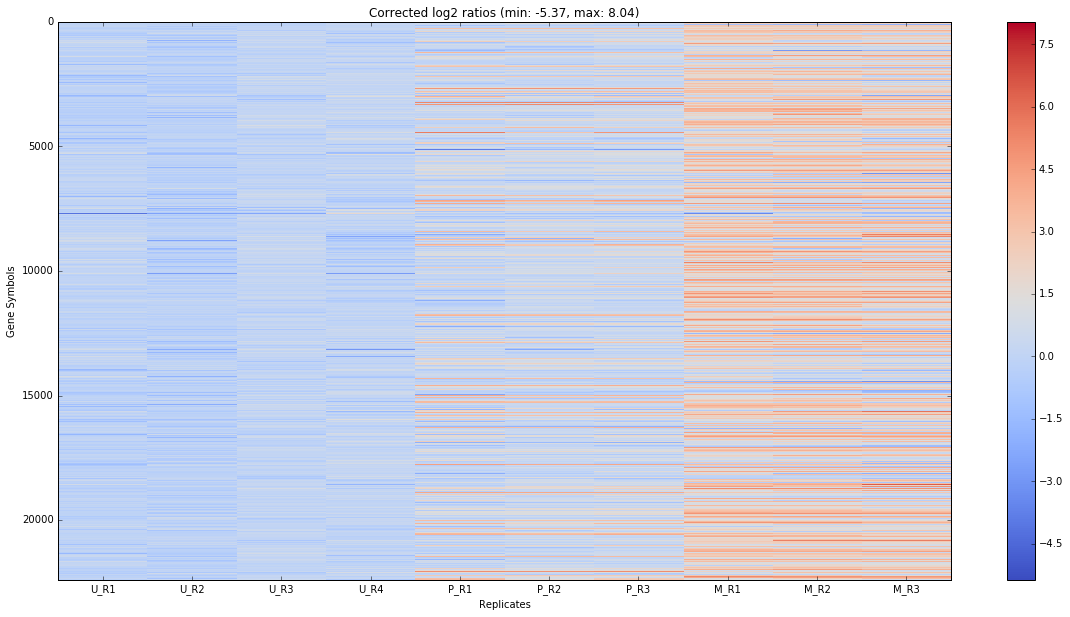

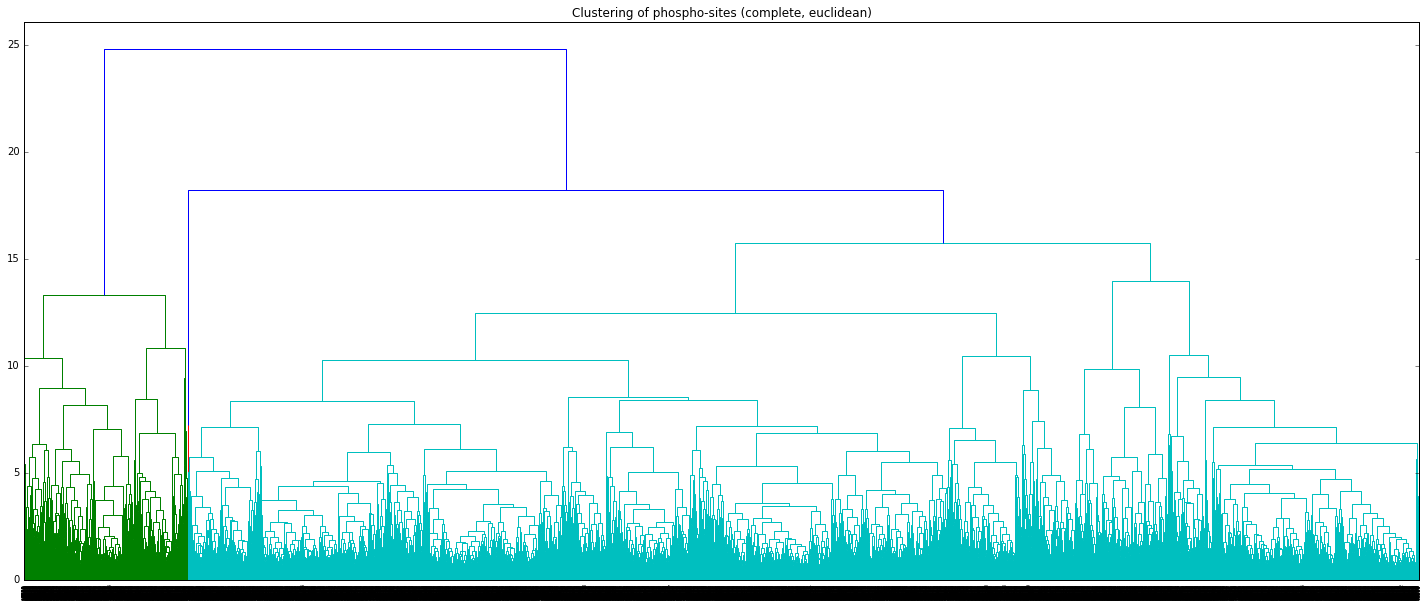

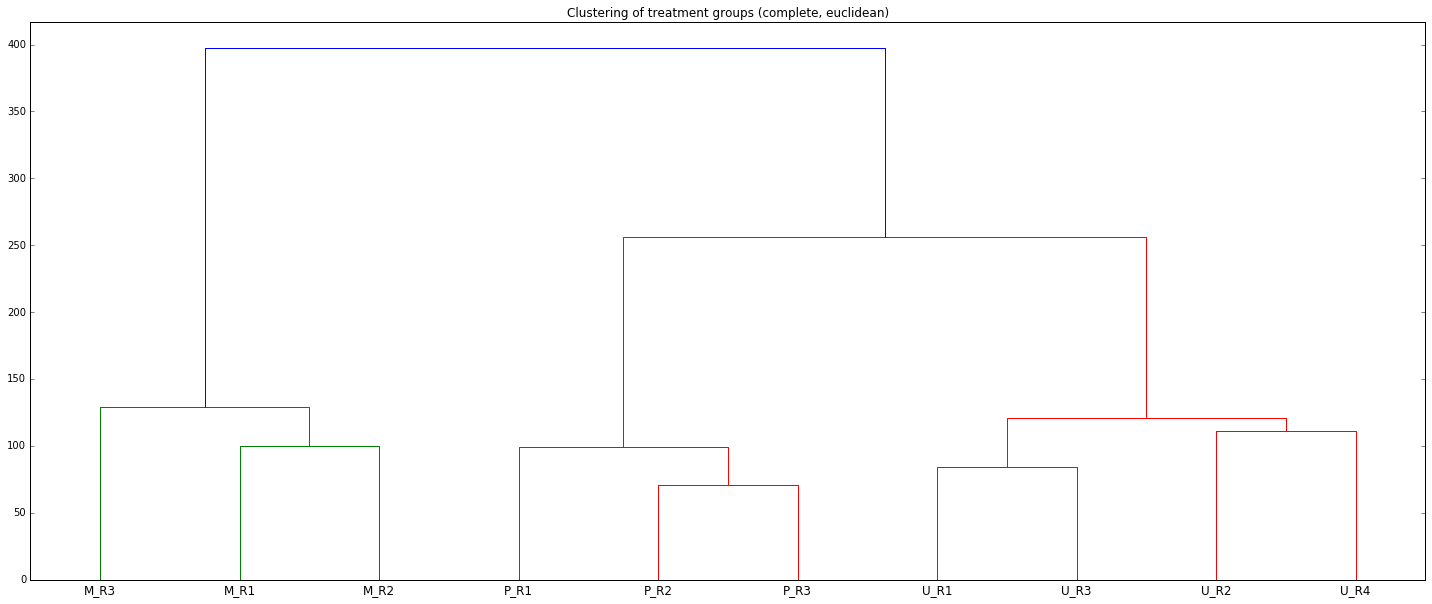

In [5]:
selected_columns = xls.columns[26:36]
print(selected_columns)

mat = xls.as_matrix(columns=selected_columns)
print(mat.shape)

min_val = np.min(mat)
max_val = np.max(mat)
print(min_val, max_val)

plot_heatmap(mat, min_val=min_val, max_val=max_val)
cluster_and_plot(mat)

## From Supplementary Data S2, only novel sites

Index(['Untreated R#1 normalized log2 ratio 126/(126+127N+127C+128N)',
       'Untreated R#2 normalized log2 ratio 127 N/(126+127N+127C+128N)',
       'Untreated R#3 normalized log2 ratio 127 C/(126+127N+127C+128N)',
       'Untreated R#4 normalized log2 ratio 128 N/(126+127N+127C+128N)',
       'Pervanadate R#1 normalized log2 ratio 128 C/(126+127N+127C+128N)',
       'Pervanadate R#2 normalized log2 ratio 129 N/(126+127N+127C+128N)',
       'Pervanadate R#3 normalized log2 ratio 129 C/(126+127N+127C+128N)',
       'Mitotic R#1 normalized log2 ratio 130 N/(126+127N+127C+128N)',
       'Mitotic R#2 normalized log2 ratio 130 C/(126+127N+127C+128N)',
       'Mitotic R#3 normalized log2 ratio 131/(126+127N+127C+128N)'],
      dtype='object')
(1173, 10)
-3.77322818472 6.91354243847


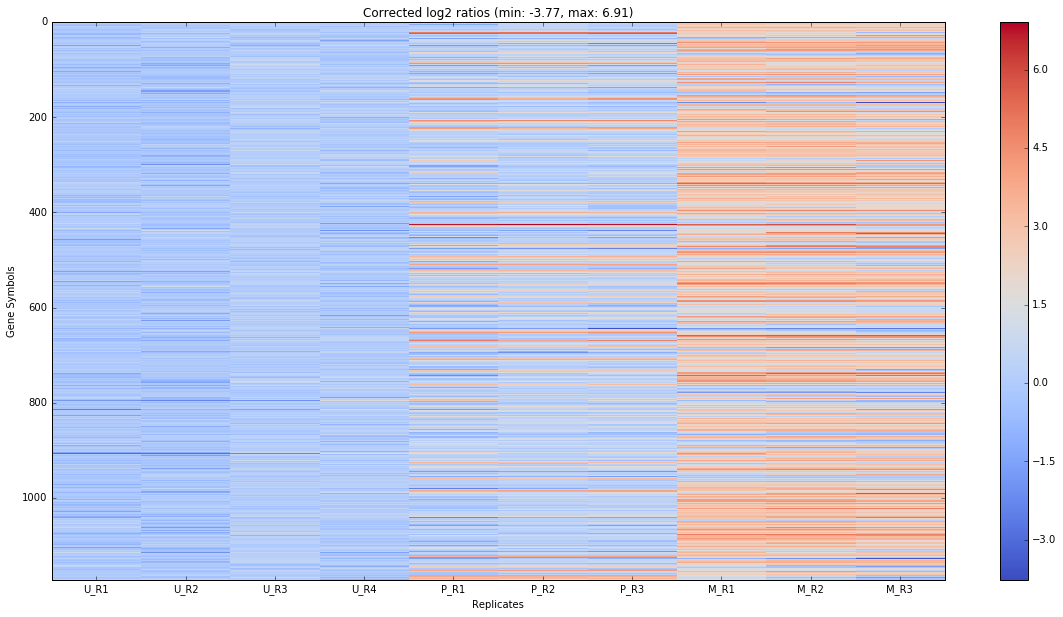

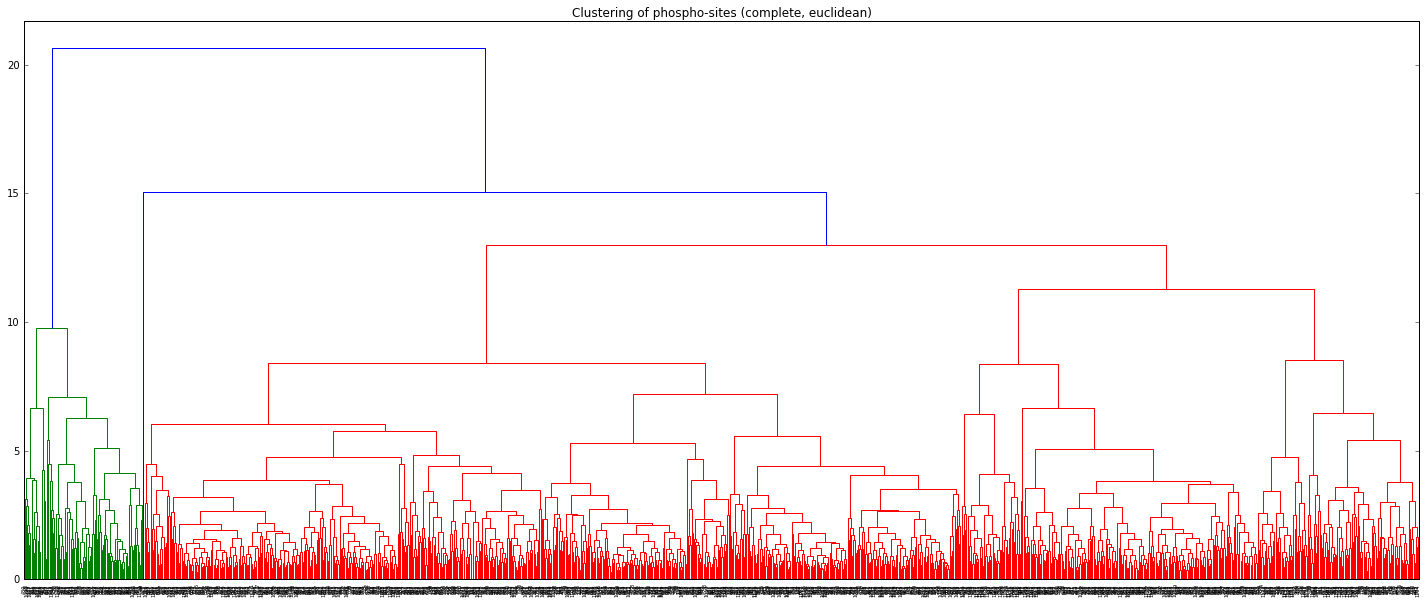

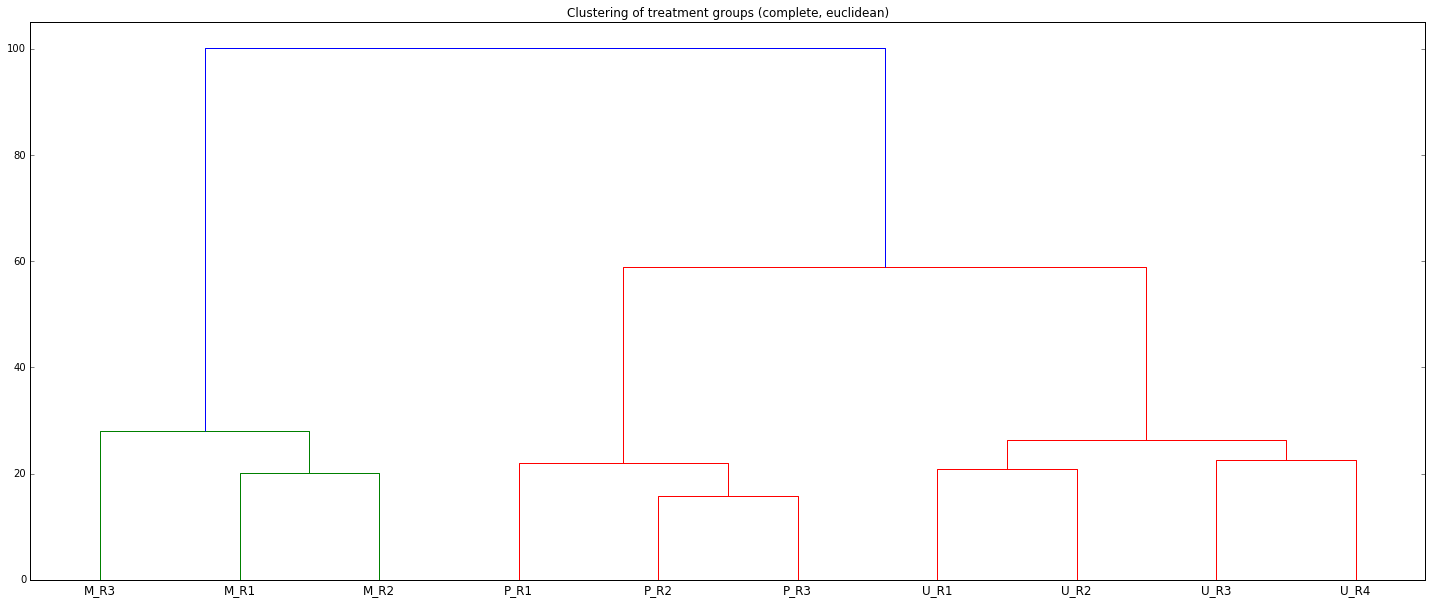

In [6]:
novel_xls = xls.loc[xls["Novel phospho-site"] == True]
#print(novel_xls)

selected_columns = novel_xls.columns[26:36]
print(selected_columns)

mat = novel_xls.as_matrix(columns=selected_columns)
print(mat.shape)

min_val = np.min(mat)
max_val = np.max(mat)
print(min_val, max_val)

plot_heatmap(mat, min_val=min_val, max_val=max_val)
cluster_and_plot(mat)